# Imports and preparation

In [25]:
import os

In [26]:
import numpy as np

In [27]:
import pandas as pd

In [28]:
from tqdm import tqdm

In [17]:
import time, gc

In [18]:
import importlib

In [19]:
from pathlib import Path

In [20]:
from util import util_elastic

In [21]:
from util import util_pipeline

In [22]:
# Para ter repetibilidade nos resultados
random_state = 1

# Tratar valores infinitos (+ e -) como np.NaN
pd.options.mode.use_inf_as_na = True

# IMPORTANTE para tornar figuras interativas
# %matplotlib notebook

# Tamanho padrão das figuras
figsize=(10,6)

pd.set_option('display.max_row', 1000)

pd.set_option('display.max_columns', 50)

pd.set_option('display.column_space', 40)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 200)


In [23]:
PATH_QUERY = '../data/juris_tcu/query1.csv'
PATH_QREL =  '../data/juris_tcu/qrel.csv'

# Create reference to index (elastic search)

In [29]:
index_dict = util_elastic.return_indexes('indir', parm_print=True)

Index: indir_juris_tcu
{'health': 'yellow', 'status': 'open', 'index': 'indir_juris_tcu', 'uuid': 'RD_aAWppQH6vjNxKUdL_0w', 'pri': '1', 'rep': '1', 'docs.count': '16045', 'docs.deleted': '16045', 'store.size': '334.9mb', 'pri.store.size': '334.9mb'}

Index: indir_juris_tcu_index
{'health': 'yellow', 'status': 'open', 'index': 'indir_juris_tcu_index', 'uuid': 'fGjzBrQzRUWTZ6KlnbfLqw', 'pri': '1', 'rep': '1', 'docs.count': '13255', 'docs.deleted': '2755', 'store.size': '281.7mb', 'pri.store.size': '281.7mb'}



In [30]:
index_dict

{'indir_juris_tcu': {'health': 'yellow',
  'status': 'open',
  'index': 'indir_juris_tcu',
  'uuid': 'RD_aAWppQH6vjNxKUdL_0w',
  'pri': '1',
  'rep': '1',
  'docs.count': '16045',
  'docs.deleted': '16045',
  'store.size': '334.9mb',
  'pri.store.size': '334.9mb'},
 'indir_juris_tcu_index': {'health': 'yellow',
  'status': 'open',
  'index': 'indir_juris_tcu_index',
  'uuid': 'fGjzBrQzRUWTZ6KlnbfLqw',
  'pri': '1',
  'rep': '1',
  'docs.count': '13255',
  'docs.deleted': '2755',
  'store.size': '281.7mb',
  'pri.store.size': '281.7mb'}}

In [31]:
INDEX_NAME = 'indir_juris_tcu'

In [32]:
index = util_elastic.return_index(parm_index_name=INDEX_NAME)


Qtd de documentos 16045

Qtd de embeddings 16045

Documento.id=5: <Document: id=5, content='SÚMULA TCU 1: Não se compreendem como vencimento, para efeito de concessão da pensão especial com fu...'>


# Busca

In [34]:
# Test query
# parm_query = "trata-se de uma denúncia contra o prefeito de Manhuaçu por não haver pago os funcionários da área de limpeza urbana"
parm_query = "técnica e preço"

In [35]:
# se precisar reload
importlib.reload(util_pipeline)

<module 'util.util_pipeline' from '/home/borela/fontes/ind-ir/code/util/util_pipeline.py'>

In [36]:
%%time
pipe = util_pipeline.return_pipeline_bm25(index)

CPU times: user 511 µs, sys: 45 µs, total: 556 µs
Wall time: 555 µs


In [38]:
%%time
doctos_retornados = pipe.run(query=parm_query, 
 params={"Retriever": {"top_k": 1000}})


CPU times: user 13.7 ms, sys: 4.16 ms, total: 17.9 ms
Wall time: 1.89 s


In [39]:
doctos_retornados.keys()

dict_keys(['documents', 'root_node', 'params', 'query', 'node_id'])

In [40]:
doctos_retornados['documents'][0]

<Document: {'content': 'Nas licitações do tipo técnica e preço, a atribuição de pontuação distinta para técnica e preço demanda justificativa.', 'content_type': 'text', 'score': 0.829135766057232, 'meta': {'area_name': 'Licitação', 'num_tokens_monot5_3b': 33, 'normative_author_name': 'AUGUSTO SHERMAN', 'normative_date': '2011-03-02', 'normative_author_type': 'RELATOR', 'normative_process_type': 'DENÚNCIA', 'num_word': 18, 'reference_list': '', 'paradigmatic': '', 'area_id_descriptor': 932, 'len_text_char_log': 5, 'num_tokens_minilm': 25, 'id': 20870, 'normative_identification': 'Acórdão 546/2011 - Plenário', 'len_text_char': 118}, 'id_hash_keys': ['content'], 'embedding': None, 'id': '20870'}>

In [41]:
util_pipeline.detail_document_found(doctos_retornados)

Parâmetros usados: {'Retriever': {'top_k': 1000}}
Consulta: técnica e preço
Qtd documentos retornados: 1000
Primeiro docto:
<Document: id=20870, content='Nas licitações do tipo técnica e preço, a atribuição de pontuação distinta para técnica e preço dema...'>

Último (1000):
<Document: id=19476, content='Estende-se aos membros do Tribunal de Contas da União e do Ministério Público junto ao Tribunal o di...'>
Seguem os nomes dos termos recuperados em ordem de score
0 : [0.829135766057232, '20870', 'Nas licitações do tipo técnica e preço, a atribuição de pontuação distinta para técnica e preço demanda justificativa.']
1 : [0.8155024511903081, '53641', 'Em licitações do tipo técnica e preço com preponderância da proposta técnica, os fatores de ponderação entre técnica e preço deverão ser expressamente fundamentados, a fim de evidenciar sua razoabilidade e demonstrar que não representam privilégio ou proporcionam aumento indevido de preço em decorrência de diferenças técnicas não substanci

        pipe options
        util_pipeline.return_pipeline_sts_multihop(index)
        util_pipeline.return_pipeline_join(index)
        util_pipeline.return_pipeline_sts_multihop_reranker(index, 'MONOT5', parm_limit_query_size=350)
        util_pipeline.return_pipeline_join_reranker(index, 'MONOT5', parm_limit_query_size=350)
        util_pipeline.return_pipeline_bm25_reranker(index, 'MONOT5', parm_limit_query_size=350)
        util_pipeline.return_pipeline_bm25_reranker(index, 'MINILM', parm_limit_query_size=350)
        util_pipeline.return_pipeline_sts_reranker(index, 'MINILM', parm_limit_query_size=350)
        util_pipeline.return_pipeline_sts_reranker(index, 'MONOT5', parm_limit_query_size=350)

imprimir o pipe

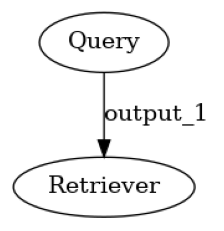

In [23]:
util_pipeline.print_pipe_image(pipe)

In [ ]:
# pipe.save_to_yaml(Path("pipe_join_ranker_monot5_3b.yahml"), return_defaults = True)


## Carga dos documentos

In [85]:
import pandas as pd

df_docs = pd.read_csv('../data/juris_tcu/doc.csv', index_col='ID')[['TEXT']]
df_docs

,TEXT
ID,
13568,"É ilegal a contagem de tempo ficto de serviço prestado sob a égide da Lei 3.313/1957, proporcion..."
11614,"SÚMULA TCU 283: Para fim de habilitação, a Administração Pública não deve exigir dos licitantes ..."
21087,"A contratação de serviços por preços superiores às referências legais (Sinapi e Sicro) deve ser,..."
35016,"Não se aplica, excepcionalmente, multa aos gestores por grave infração à norma legal se a irregu..."
29370,"Em contratatações de TI, não cabe aceitar propostas de preço com incidência de encargos majorado..."
...,...
55,"SÚMULA TCU 51: Quando, no exame e julgamento das contas de responsáveis por bens, valores e dinh..."
95,"SÚMULA TCU 91: A falta de remessa, em tempo hábil e para os devidos fins, aos órgãos competentes..."
94,"SÚMULA TCU 90: O Parecer Prévio, em sentido favorável, emitido pelo Tribunal de Contas da União,..."


In [86]:
doc_content = df_docs.to_dict()['TEXT']
for id in sorted(list(doc_content.keys()))[5:450:80]:
    print(id, '-', doc_content[id])

10 - SÚMULA TCU 6: As empresas públicas estão sujeitas à prestação de contas da gestão anual de seus administradores, perante o Tribunal de Contas, independentemente de dispositivo de lei ordinária que o estabeleça.
101 - SÚMULA TCU 97: Ressalvada a hipótese prevista no parágrafo único do art. 3º da Lei nº 5.645, de 10/12/70 (Decretolei nº 200, de 25/02/67, art. 10, §§ 7º e 8º), não se admite, a partir da data da publicação do ato de implantação do novo Plano de Classificação e Retribuição de Cargos do Serviço Civil da União e das autarquias, a utilização de serviços de pessoal, mediante convênios, contratos ou outros instrumentos, celebrados com Fundações ou quaisquer entidades públicas ou privadas, para o desempenho de atividades inerentes às categorias funcionais abrangidas pelo referido Plano.
188 - SÚMULA TCU 184: Com o advento da Lei nº 6.903, de 30-04-81, o mandato de membro classista e temporário, nos órgãos da Justiça do Trabalho, configura-se como cargo público, para o fim de

## Carga das queries extraídas do log (query1.txt)

In [77]:
PATH_QUERY = '../data/juris_tcu/query1.csv'

In [82]:
import pandas as pd

df_queries = pd.read_csv(PATH_QUERY, sep=';', index_col='QUERY_ID')
df_queries

,QUERY_TEXT
QUERY_ID,
1,técnica e preço
2,restos a pagar
3,aditivo a contrato
4,adesão a ata de registro de preços
5,sobrepreço e superfaturamento
6,restrição a competitividade
7,acréscimos e supressões
8,obras e serviços de engenharia
9,fiscalizacao de contratos


In [97]:
queries = list(query.values())
queries[:10]

['técnica e preço',
 'restos a pagar',
 'aditivo a contrato',
 'adesão a ata de registro de preços',
 'sobrepreço e superfaturamento',
 'restrição a competitividade',
 'acréscimos e supressões',
 'obras e serviços de engenharia',
 'fiscalizacao de contratos',
 'diarias e passagen']

## Execução das queries

In [111]:

for query in queries:
    doctos_retornados = pipe.run(query=query, params={"Retriever": {"top_k": 1000}})
    ids = [int(doc.id) for doc in doctos_retornados['documents']]
    print(query, ids[:10])

técnica e preço [20870, 53641, 15740, 20971, 20592, 21229, 18324, 32994, 20969, 20970]
restos a pagar [32869, 77959, 17289, 19084, 18432, 18452, 56445, 19340, 31437, 76612]
aditivo a contrato [17218, 42262, 31118, 18955, 17219, 31102, 17225, 50709, 19450, 20510]
adesão a ata de registro de preços [17195, 20860, 20841, 84935, 16895, 45015, 4230, 42169, 49694, 15092]
sobrepreço e superfaturamento [16932, 32590, 21172, 53003, 16262, 21793, 17816, 77235, 58375, 85914]
restrição a competitividade [28863, 20902, 16409, 17372, 6587, 22824, 22133, 18291, 20926, 21904]
acréscimos e supressões [18936, 10089, 49135, 18020, 17068, 17204, 11604, 17205, 18019, 17209]
obras e serviços de engenharia [17363, 32956, 17370, 22192, 20563, 18058, 58578, 20977, 21088, 20992]
fiscalizacao de contratos [20582, 32641, 9777, 49458, 32610, 18369, 18024, 32624, 31029, 31058]
diarias e passagen [28905, 15769, 31190, 18253, 28908, 39037, 43654, 17296, 28929, 26111]
bens e serviços comuns [17911, 18245, 17913, 18272

KeyboardInterrupt: 